# Phising identification
**To develop a machine learning model to identify the websites that initiate phising attacks on internet users**

# Data description:

=>  1 - Represents legitimate. <br />
=>  0 - Represents Suspicious. <br />
=> -1 - Represents phising. <br />

* Key - Unique key of the website.
* Having_ip - IP address of the website (-1,1).
* URL_length - Length of the url (1,0,-1).
* Shortining_Service - shortening the url (1,-1).
* having_At_Symbol - having the @ symbol (1,-1).
* double_slash_redirecting - Site redirecting (1,-1).
* Prefix_Suffix - SUffix and prefix of the website (1,-1).
* having_Sub_Domain - Having sub domain (1,0,-1).
* SSLfinal_State - Final state of SSL (1,0,-1).
* Domain_registeration_length - Registration of domain length (1,-1).
* Favicon - Graphic image (1,-1).
* port - Having port or not (1,-1).
* HTTPS_token - Safe link or not (1,-1).
* Request_URL - Request other url or not (1,-1).
* URL_of_Anchor - URL anchor (1,0,-1).
* Links_in_tags - Link tagging (1,0,-1).
* SFH - Server form handler (1,0,-1).
* Submitting_to_email - submitting our actions to mail (1,-1).
* Abnormal_URL - Abnormal uniform resorce locator (1,-1).
* Redirect - Redirecting to other websites (1,0).
* on_mouseover - On mouse overing in website (1,-1).
* RightClick - Right click in website (1,-1).
* popUpWidnow - Pop up window (1,-1).
* Iframe - Iframe in website (1,-1).
* age_of_domain - Domain age of website (1,-1).
* DNSRecord - Record of DNS server (1,-1).
* web_traffic - Web traffic (1,0,-1).
* Page_Rank - Page ranking (1,-1).
* Google_Index - Indexing in google (1,-1).
* Links_pointing_to_page - Other link to pages (1,0,-1).
* Statistical_report - Statistical report (1,-1).
* Result - Phising website or not (1,-1).

# Library imports

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Phising_Training_Dataset.csv")

In [4]:
df.head()

,key,having_IP,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,12344,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,12345,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,12346,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,12347,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,12348,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [5]:
df.tail()

,key,having_IP,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
8950,21294,1,-1,1,-1,1,1,1,1,-1,...,-1,-1,1,1,-1,-1,1,1,1,1
8951,21295,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,1,1,1,1,1,1,-1,1,-1
8952,21296,1,-1,1,1,1,-1,1,-1,-1,...,1,1,1,1,1,-1,1,0,1,-1
8953,21297,-1,-1,1,1,1,-1,-1,-1,1,...,-1,1,1,1,1,-1,1,1,1,-1
8954,21298,-1,-1,1,1,1,-1,-1,-1,1,...,1,1,-1,1,-1,-1,-1,1,-1,-1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8955 entries, 0 to 8954
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   key                          8955 non-null   int64
 1   having_IP                    8955 non-null   int64
 2   URL_Length                   8955 non-null   int64
 3   Shortining_Service           8955 non-null   int64
 4   having_At_Symbol             8955 non-null   int64
 5   double_slash_redirecting     8955 non-null   int64
 6   Prefix_Suffix                8955 non-null   int64
 7   having_Sub_Domain            8955 non-null   int64
 8   SSLfinal_State               8955 non-null   int64
 9   Domain_registeration_length  8955 non-null   int64
 10  Favicon                      8955 non-null   int64
 11  port                         8955 non-null   int64
 12  HTTPS_token                  8955 non-null   int64
 13  Request_URL                  8955 non-null   int

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
key,8955.0,16821.000000,2585.230164,12344.0,14582.5,16821.0,19059.5,21298.0
having_IP,8955.0,0.307203,0.951697,-1.0,-1.0,1.0,1.0,1.0
URL_Length,8955.0,-0.635734,0.763660,-1.0,-1.0,-1.0,-1.0,1.0
Shortining_Service,8955.0,0.740480,0.672116,-1.0,1.0,1.0,1.0,1.0
having_At_Symbol,8955.0,0.709436,0.704809,-1.0,1.0,1.0,1.0,1.0
double_slash_redirecting,8955.0,0.740704,0.671870,-1.0,1.0,1.0,1.0,1.0
Prefix_Suffix,8955.0,-0.735343,0.677733,-1.0,-1.0,-1.0,-1.0,1.0
having_Sub_Domain,8955.0,0.071803,0.817419,-1.0,-1.0,0.0,1.0,1.0
SSLfinal_State,8955.0,0.264545,0.908003,-1.0,-1.0,1.0,1.0,1.0
Domain_registeration_length,8955.0,-0.336460,0.941750,-1.0,-1.0,-1.0,1.0,1.0


In [8]:
df.isnull().sum()

key                            0
having_IP                      0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistica

In [9]:
#defining categorical and numerical features
categorical = df.select_dtypes(include=[np.object])
print("Number of categorical variables:",categorical.shape[1])

numerical = df.select_dtypes(include=[np.float64,np.int64])
print("Number of numerical variables:",numerical.shape[1])

Number of categorical variables: 0
Number of numerical variables: 32


# Univariate analysis

<AxesSubplot:xlabel='having_IP', ylabel='count'>

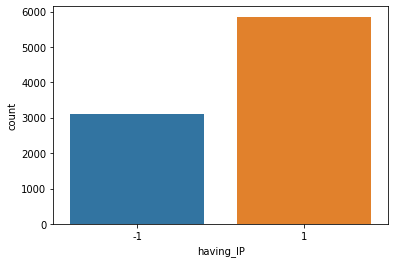

In [10]:
sns.countplot(df["having_IP"])

<AxesSubplot:ylabel='URL_Length'>

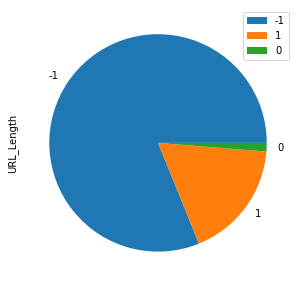

In [11]:
pie1 = df['URL_Length'].value_counts()
pie1.plot(kind="pie",figsize=(10,5),legend = True)

<AxesSubplot:>

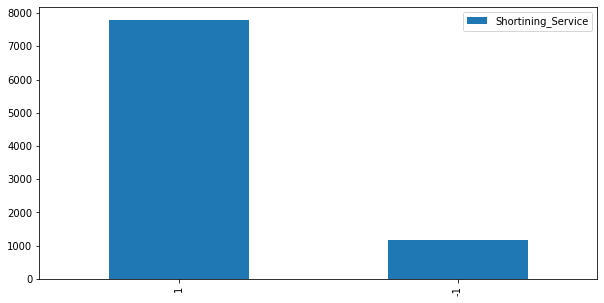

In [12]:
bar1 = df["Shortining_Service"].value_counts()
bar1.plot(kind="bar",figsize=(10,5),legend = True)

<AxesSubplot:xlabel='having_At_Symbol', ylabel='count'>

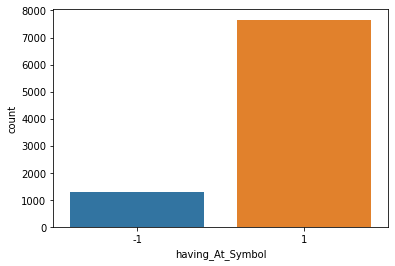

In [13]:
sns.countplot(df["having_At_Symbol"])

<AxesSubplot:ylabel='double_slash_redirecting'>

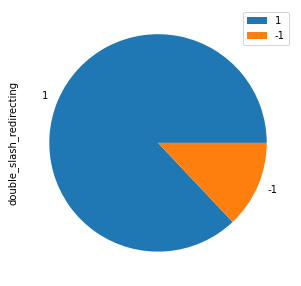

In [14]:
pie2 = df['double_slash_redirecting'].value_counts()
pie2.plot(kind="pie",figsize=(10,5),legend = True)

<AxesSubplot:>

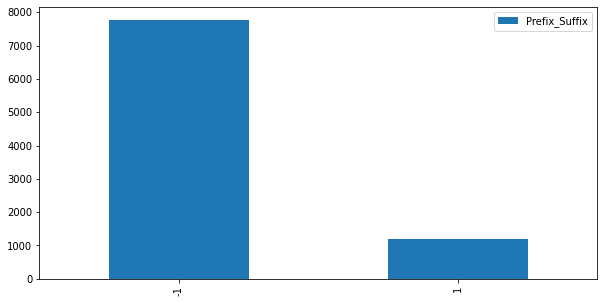

In [15]:
bar2 = df["Prefix_Suffix"].value_counts()
bar2.plot(kind="bar",figsize=(10,5),legend = True)

<AxesSubplot:xlabel='having_Sub_Domain', ylabel='count'>

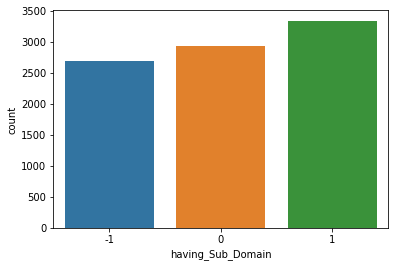

In [16]:
sns.countplot(df["having_Sub_Domain"])

<AxesSubplot:ylabel='SSLfinal_State'>

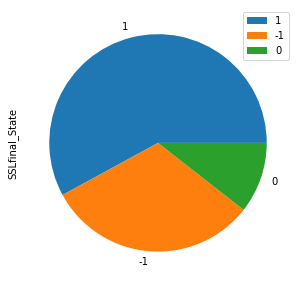

In [17]:
pie3 = df['SSLfinal_State'].value_counts()
pie3.plot(kind="pie",figsize=(10,5),legend = True)

<AxesSubplot:>

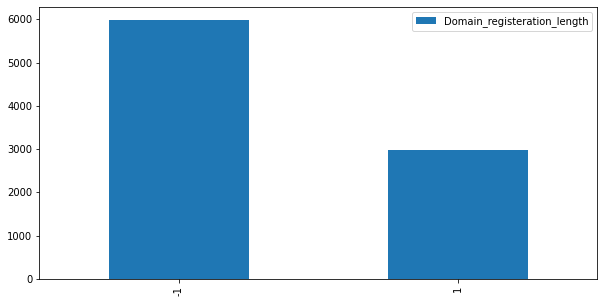

In [18]:
bar3 = df["Domain_registeration_length"].value_counts()
bar3.plot(kind="bar",figsize=(10,5),legend = True)

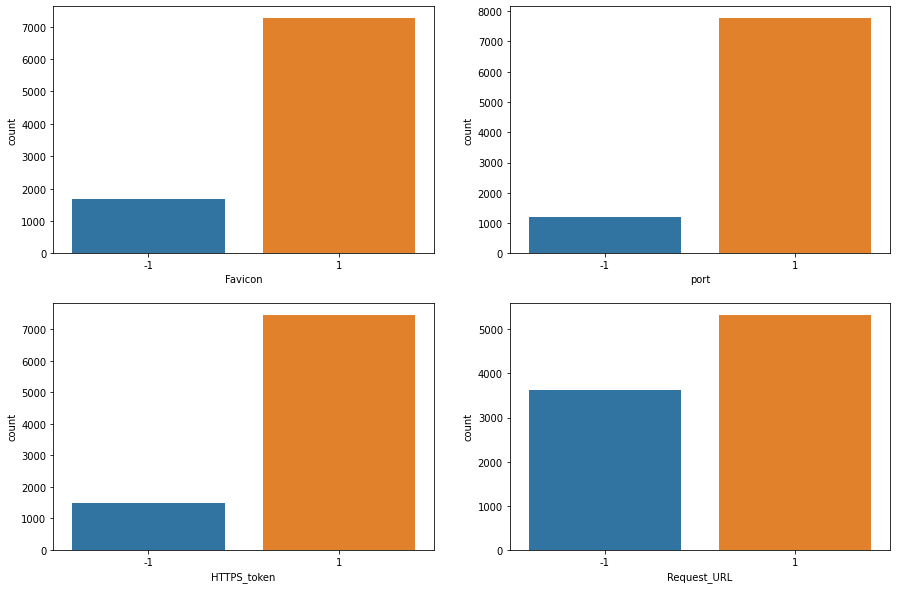

In [19]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.countplot(df['Favicon'])
plt.subplot(2,2,2)
sns.countplot(df['port'])
plt.subplot(2,2,3)
sns.countplot(df['HTTPS_token'])
plt.subplot(2,2,4)
sns.countplot(df['Request_URL'])
plt.show()

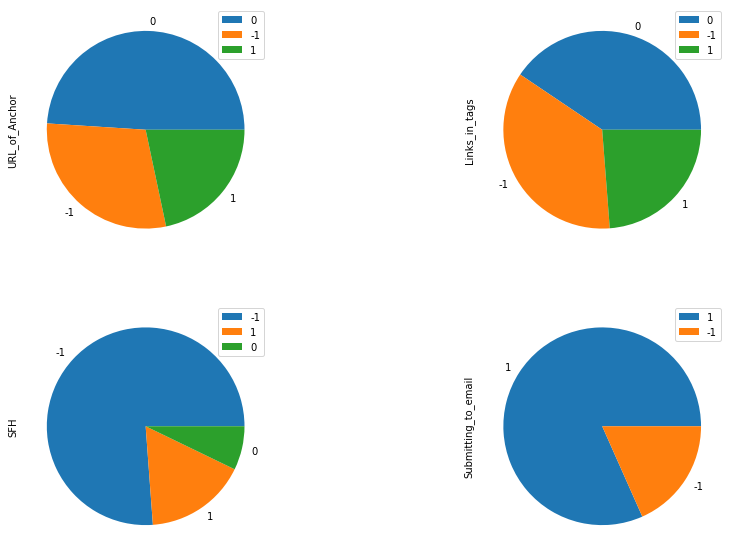

In [20]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
pie4 = df['URL_of_Anchor'].value_counts()
pie4.plot(kind="pie",legend = True)
plt.subplot(2,2,2)
pie5 = df['Links_in_tags'].value_counts()
pie5.plot(kind="pie",legend = True)
plt.subplot(2,2,3)
pie6 = df['SFH'].value_counts()
pie6.plot(kind="pie",legend = True)
plt.subplot(2,2,4)
pie7 = df['Submitting_to_email'].value_counts()
pie7.plot(kind="pie",legend = True)
plt.show()

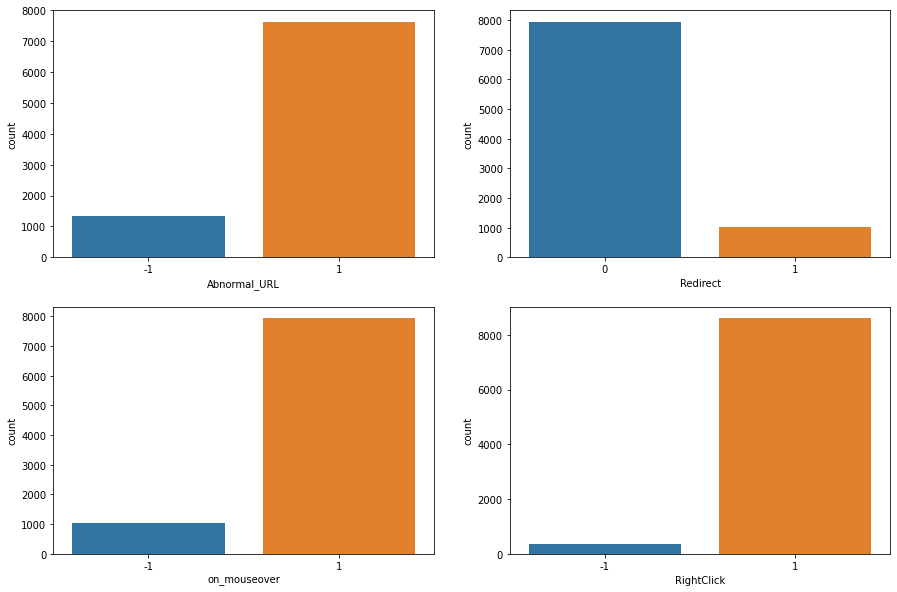

In [21]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.countplot(df['Abnormal_URL'])
plt.subplot(2,2,2)
sns.countplot(df['Redirect'])
plt.subplot(2,2,3)
sns.countplot(df['on_mouseover'])
plt.subplot(2,2,4)
sns.countplot(df['RightClick'])
plt.show()

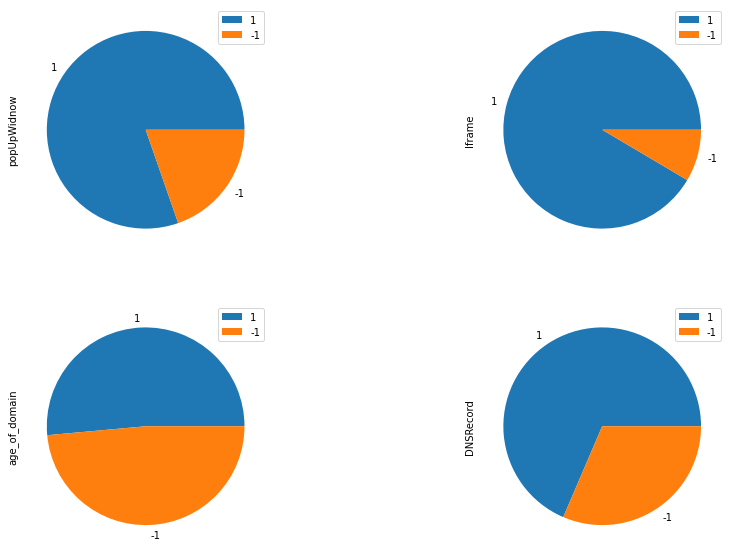

In [22]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
pie8 = df['popUpWidnow'].value_counts()
pie8.plot(kind="pie",legend = True)
plt.subplot(2,2,2)
pie9 = df['Iframe'].value_counts()
pie9.plot(kind="pie",legend = True)
plt.subplot(2,2,3)
pie10 = df['age_of_domain'].value_counts()
pie10.plot(kind="pie",legend = True)
plt.subplot(2,2,4)
pie11 = df['DNSRecord'].value_counts()
pie11.plot(kind="pie",legend = True)
plt.show()

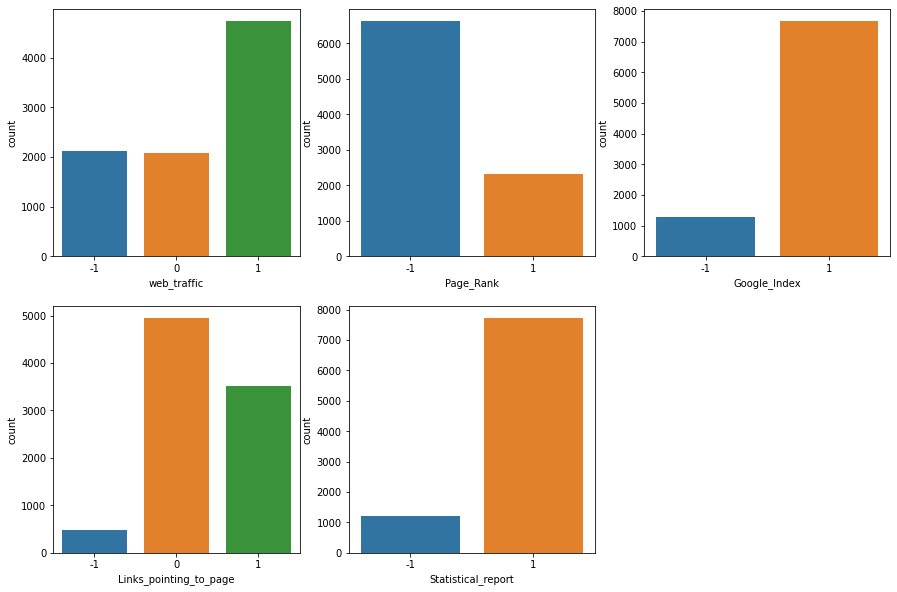

In [23]:
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
sns.countplot(df['web_traffic'])
plt.subplot(2,3,2)
sns.countplot(df['Page_Rank'])
plt.subplot(2,3,3)
sns.countplot(df['Google_Index'])
plt.subplot(2,3,4)
sns.countplot(df['Links_pointing_to_page'])
plt.subplot(2,3,5)
sns.countplot(df['Statistical_report'])
plt.show()

<AxesSubplot:>

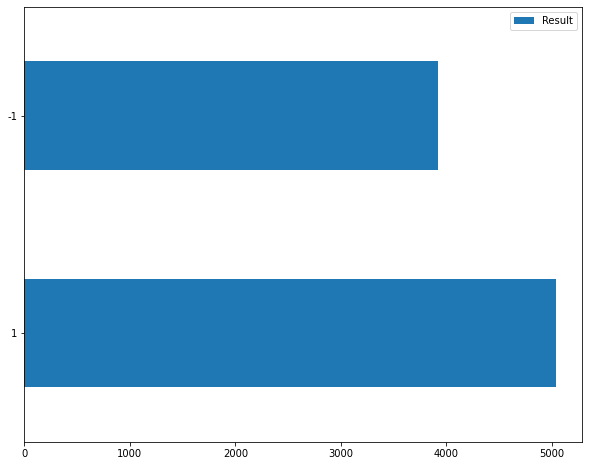

In [24]:
pie12 = df['Result'].value_counts()
pie12.plot(kind="barh",figsize=(10,8),legend = True)

In [25]:
df.columns

Index(['key', 'having_IP', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Result'],
      dtype='object')

# Removing unwanted columns

In [26]:
df = df.drop('key',axis=1)

# Statistical and encoding techniques

<AxesSubplot:>

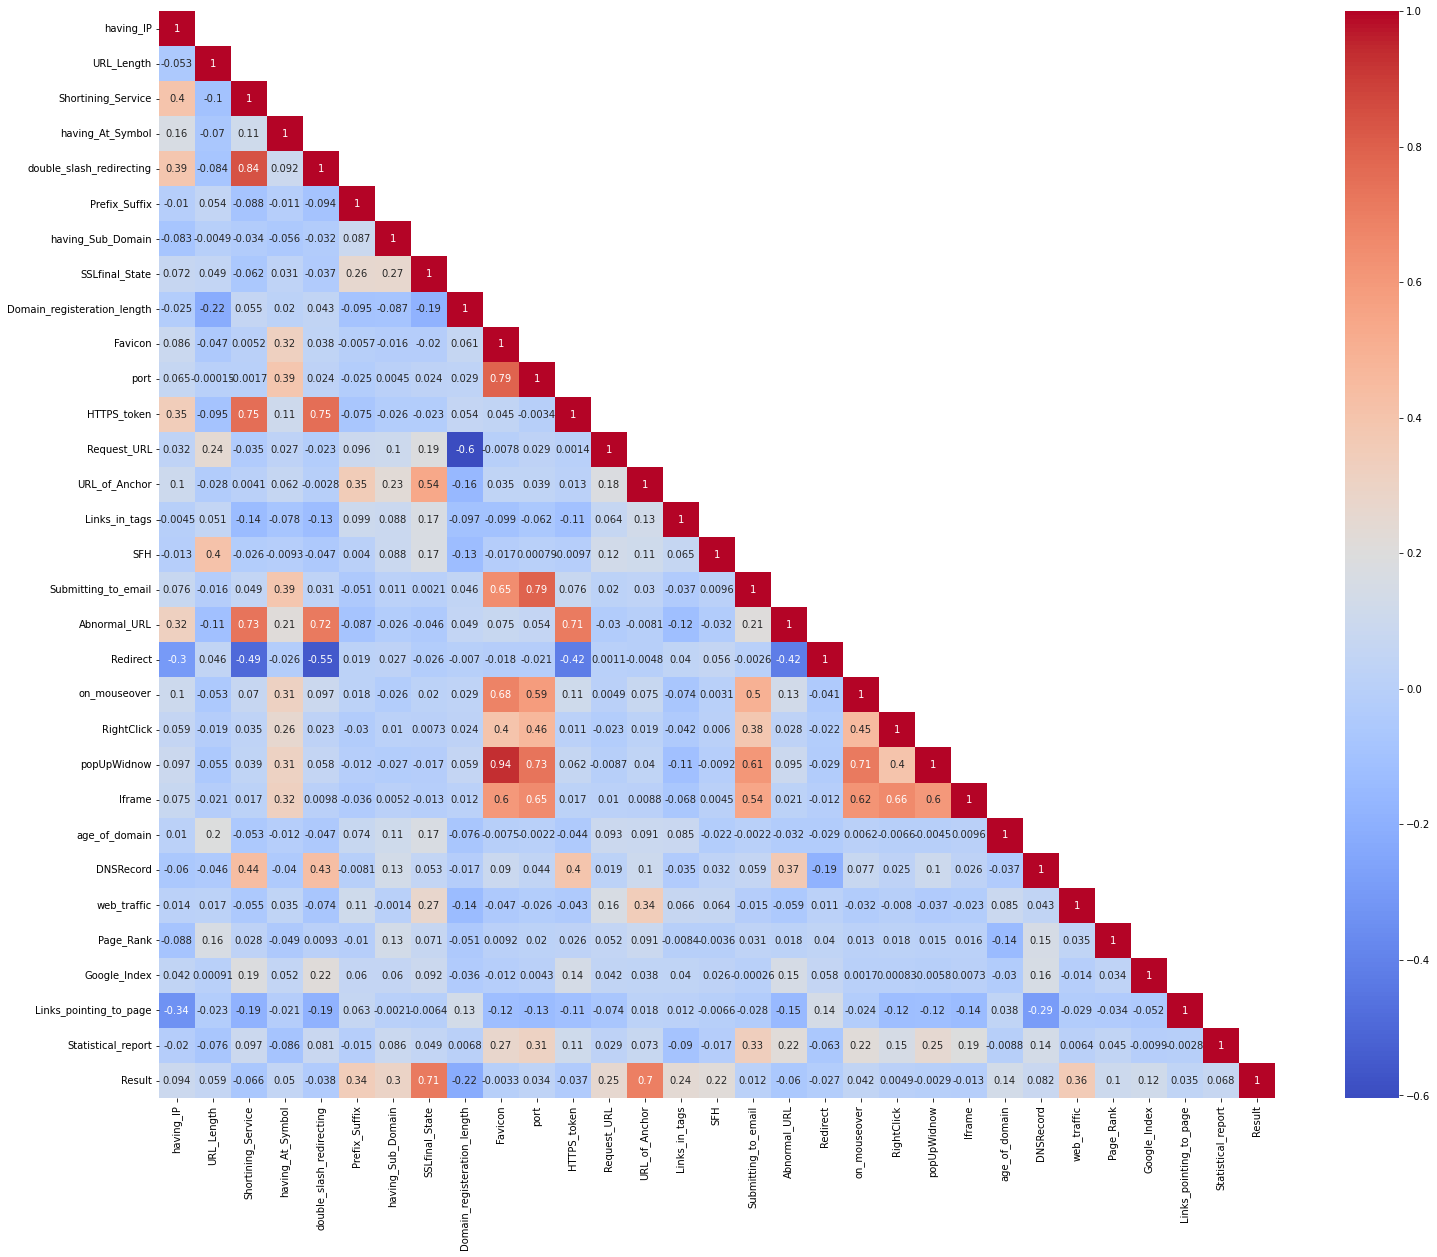

In [27]:
plt.figure(figsize=(25,20))
df_lt = df.corr(method = "pearson")
df_lt1 = df_lt.where(np.tril(np.ones(df_lt.shape)).astype(np.bool))
sns.heatmap(df_lt1,annot=True,cmap="coolwarm")

In [28]:
df['having_IP'].replace(-1,0,inplace=True)
df['Shortining_Service'].replace(-1,0,inplace=True)
df['having_At_Symbol'].replace(-1,0,inplace=True)
df['double_slash_redirecting'].replace(-1,0,inplace=True)
df['Prefix_Suffix'].replace(-1,0,inplace=True)
df['Domain_registeration_length'].replace(-1,0,inplace=True)
df['Favicon'].replace(-1,0,inplace=True)
df['port'].replace(-1,0,inplace=True)
df['HTTPS_token'].replace(-1,0,inplace=True)
df['Request_URL'].replace(-1,0,inplace=True)
df['Submitting_to_email'].replace(-1,0,inplace=True)
df['Abnormal_URL'].replace(-1,0,inplace=True)
df['on_mouseover'].replace(-1,0,inplace=True)
df['RightClick'].replace(-1,0,inplace=True)
df['popUpWidnow'].replace(-1,0,inplace=True)
df['Iframe'].replace(-1,0,inplace=True)
df['age_of_domain'].replace(-1,0,inplace=True)
df['DNSRecord'].replace(-1,0,inplace=True)
df['Page_Rank'].replace(-1,0,inplace=True)
df['Google_Index'].replace(-1,0,inplace=True)
df['Statistical_report'].replace(-1,0,inplace=True)
df['Result'].replace(-1,0,inplace=True)

In [29]:
target = df['Result']
data = df.drop('Result',axis=1)

# Decomposition

In [30]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)

In [31]:
pca.fit(data)

PCA(n_components=10)

In [32]:
pca.explained_variance_ratio_

array([0.17741797, 0.10480126, 0.08878801, 0.0865156 , 0.06669718,
       0.06575866, 0.05849349, 0.05029902, 0.0389073 , 0.0364458 ])

<AxesSubplot:>

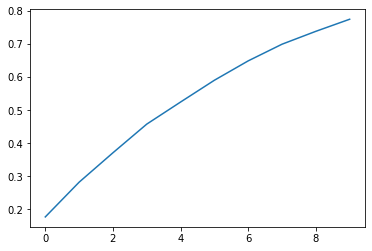

In [33]:
sns.lineplot(x = np.arange(len(pca.explained_variance_ratio_)), y = np.cumsum(pca.explained_variance_ratio_))

In [34]:
x_pca = pca.transform(data)

# Model splitting

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x_pca,target,test_size=0.30)

In [36]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6268, 10)
(2687, 10)
(6268,)
(2687,)


# Model building
**Logistic Regression**

In [37]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [38]:
x_pred = lr.predict(X_train)
y_pred = lr.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score,plot_confusion_matrix
print("Training accuracy: ",accuracy_score(y_train,x_pred))
print("Testing accuracy: ",accuracy_score(y_test,y_pred))

Training accuracy:  0.9157626037013401
Testing accuracy:  0.9199851135094901


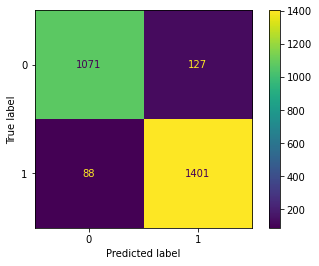

In [40]:
plot_confusion_matrix(lr,X_test,y_test,values_format='d')

**Support vector machine**

In [41]:
from sklearn.svm import SVC
sv = SVC()
sv.fit(X_train,y_train)

SVC()

In [42]:
x_pred1 = sv.predict(X_train)
y_pred1 = sv.predict(X_test)

In [43]:
print("Training accuracy: ",accuracy_score(y_train,x_pred1))
print("Testing accuracy: ",accuracy_score(y_test,y_pred1))

Training accuracy:  0.9463943841735801
Testing accuracy:  0.9378489021213249


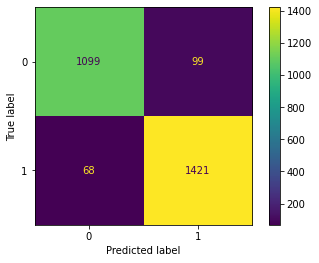

In [44]:
plot_confusion_matrix(sv,X_test,y_test,values_format='d')

**XGBoost**

In [45]:
from xgboost import XGBClassifier
xg = XGBClassifier(n_estimators=1000)
xg.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [46]:
x_pred2 = xg.predict(X_train)
y_pred2 = xg.predict(X_test)

In [47]:
print("Training accuracy: ",accuracy_score(y_train,x_pred2))
print("Testing accuracy: ",accuracy_score(y_test,y_pred2))

Training accuracy:  0.9913848117421825
Testing accuracy:  0.9519910681056941


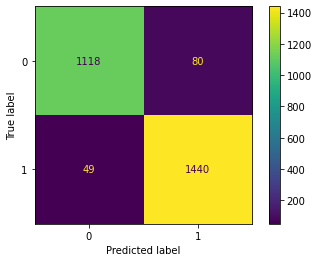

In [48]:
plot_confusion_matrix(xg,X_test,y_test,values_format='d')

**Decision Tree**

In [50]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [51]:
x_pred3 = dt.predict(X_train)
y_pred3 = dt.predict(X_test)

In [52]:
print("Training accuracy: ",accuracy_score(y_train,x_pred3))
print("Testing accuracy: ",accuracy_score(y_test,y_pred3))

Training accuracy:  0.9913848117421825
Testing accuracy:  0.9363602530703387


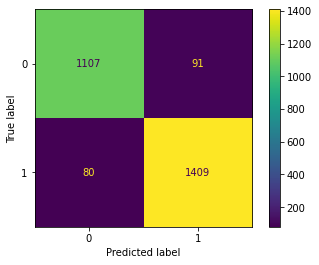

In [53]:
plot_confusion_matrix(dt,X_test,y_test,values_format='d')

**Random Forest**

In [54]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)

RandomForestClassifier()

In [57]:
x_pred4 = rf.predict(X_train)
y_pred4 = rf.predict(X_test)

In [58]:
print("Training accuracy: ",accuracy_score(y_train,x_pred4))
print("Testing accuracy: ",accuracy_score(y_test,y_pred4))

Training accuracy:  0.9913848117421825
Testing accuracy:  0.9490137700037217


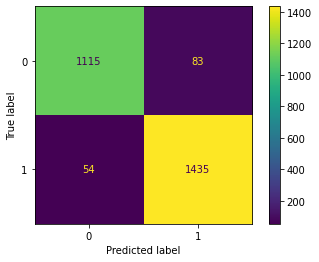

In [59]:
plot_confusion_matrix(rf,X_test,y_test,values_format='d')

# Validate the testing model

In [60]:
test = pd.read_csv("Phising_Testing_Dataset.csv")
test.head()

,key,having_IP,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
0,21338,1,1,1,1,1,1,-1,1,-1,...,1,1,1,1,1,1,1,-1,0,1
1,21339,1,-1,1,1,1,-1,0,-1,1,...,1,1,1,-1,-1,0,-1,-1,0,1
2,21340,1,-1,1,1,1,-1,0,0,-1,...,-1,-1,-1,1,-1,1,-1,1,1,-1
3,21341,-1,-1,-1,1,-1,-1,-1,-1,1,...,1,-1,-1,1,-1,1,-1,1,1,-1
4,21342,1,-1,1,1,1,-1,1,1,-1,...,1,1,1,1,1,1,-1,1,0,1


In [61]:
test_org = test.drop('key',axis=1)

In [62]:
test_org

,having_IP,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
0,1,1,1,1,1,1,-1,1,-1,1,...,1,1,1,1,1,1,1,-1,0,1
1,1,-1,1,1,1,-1,0,-1,1,1,...,1,1,1,-1,-1,0,-1,-1,0,1
2,1,-1,1,1,1,-1,0,0,-1,-1,...,-1,-1,-1,1,-1,1,-1,1,1,-1
3,-1,-1,-1,1,-1,-1,-1,-1,1,-1,...,1,-1,-1,1,-1,1,-1,1,1,-1
4,1,-1,1,1,1,-1,1,1,-1,1,...,1,1,1,1,1,1,-1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,-1,-1,-1,1,-1,-1,1,1,1,1,...,1,1,1,1,-1,1,-1,-1,1,1
2096,1,1,1,-1,1,-1,1,1,-1,-1,...,1,-1,1,-1,1,-1,1,1,1,1
2097,1,-1,1,1,1,-1,-1,-1,1,1,...,1,1,1,-1,1,0,-1,1,0,1
2098,1,-1,1,-1,1,-1,0,-1,-1,-1,...,1,-1,-1,1,1,-1,-1,1,1,1


In [64]:
test_org['having_IP'].replace(-1,0,inplace=True)
test_org['Shortining_Service'].replace(-1,0,inplace=True)
test_org['having_At_Symbol'].replace(-1,0,inplace=True)
test_org['double_slash_redirecting'].replace(-1,0,inplace=True)
test_org['Prefix_Suffix'].replace(-1,0,inplace=True)
test_org['Domain_registeration_length'].replace(-1,0,inplace=True)
test_org['Favicon'].replace(-1,0,inplace=True)
test_org['port'].replace(-1,0,inplace=True)
test_org['HTTPS_token'].replace(-1,0,inplace=True)
test_org['Request_URL'].replace(-1,0,inplace=True)
test_org['Submitting_to_email'].replace(-1,0,inplace=True)
test_org['Abnormal_URL'].replace(-1,0,inplace=True)
test_org['on_mouseover'].replace(-1,0,inplace=True)
test_org['RightClick'].replace(-1,0,inplace=True)
test_org['popUpWidnow'].replace(-1,0,inplace=True)
test_org['Iframe'].replace(-1,0,inplace=True)
test_org['age_of_domain'].replace(-1,0,inplace=True)
test_org['DNSRecord'].replace(-1,0,inplace=True)
test_org['Page_Rank'].replace(-1,0,inplace=True)
test_org['Google_Index'].replace(-1,0,inplace=True)
test_org['Statistical_report'].replace(-1,0,inplace=True)

In [66]:
pca.fit(test_org)

PCA(n_components=10)

In [67]:
test_pca = xg.transform(test_org)

In [77]:
test_predict = lr.predict(test_pca)

In [78]:
output = pd.DataFrame({'key':test['key'],'Result':test_predict})
output.to_csv('Submissions.csv',index=False)

# Conclusion

* All basic Machine learning models are used to predict the outcomes.
* Principal component analysis helps us to reduce the dimension of the dataset without losing important information.
* XGBoost performs well comparing to other models.